We have a 30-second extract of brainwave (EEG data) collected from the F3 electrode channel of a young individual during sleep. This data can be split into multiple frequency bands, which can be used to approximate different types of human activity (concentration, wakefulness etc.). We will analyse this data and find out the frequency band with the highest relative bandpower.

In [3]:
# Importing dependencies

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Load EEG data from file

def load_eeg_data(file_path):
    with open(file_path, 'r') as file:
        eeg_data = [float(line.strip()) for line in file]
    return eeg_data

eeg_data = load_eeg_data("eeg_data.txt")

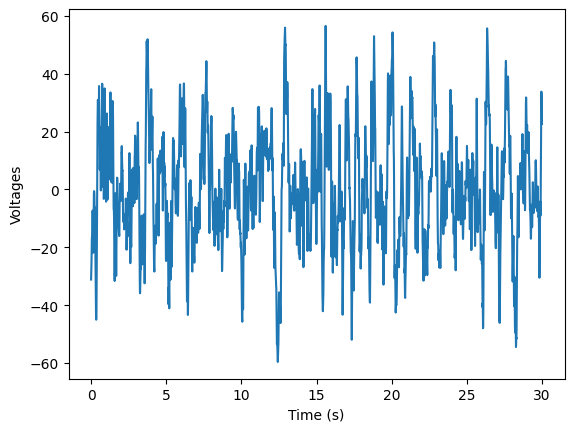

In [4]:
#showing original data on plot

dt = 0.01 #s
x = np.arange(0,30,dt)

plt.plot(x, eeg_data)
plt.xlabel("Time (s)")
plt.ylabel("Voltages")

plt.show()

Before we compute the power spectral density, there are a few concepts we need to know.

### Discrete Fourier Transform

The Discrete Fourier Transform (DFT) is a mathematical technique used to analyze the frequency components of a discrete signal, such as a sequence of numbers representing a time-domain signal. It transforms the signal from the time domain to the frequency domain, revealing the amplitude and phase information of different frequency components present in the signal.

The DFT can be represented in matrix form using the formula:

$$ X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j2\pi kn/N} $$

Where:
- \( X[k] \) is the frequency-domain representation of the signal at frequency index \( k \).
- \( x[n] \) is the time-domain signal at sample index \( n \).
- \( N \) is the total number of samples in the time-domain signal.
- $( e^{-j2\pi kn/N} )$ represents the complex exponential function, which provides the frequency analysis.

In matrix form, you can represent the DFT operation as a multiplication of the signal vector with the DFT matrix. The DFT matrix $ W $ is an $ N × N $ matrix where each element is given by $( e^{-j2\pi kn/N} )$, and its entries are arranged in a specific pattern to represent the frequency analysis.

Here's the matrix form:

$$ X = Wx $$

Where:
- $ X $ is the frequency-domain representation of the signal.
- $ x $ is the time-domain signal.
- $ W $ is the DFT matrix.

This matrix operation transforms the time-domain signal $ x $ into the frequency-domain representation $ X $, providing insights into the frequency components present in the signal. The DFT and its matrix form are fundamental tools in signal processing, communications, analysis is essential.ds where frequen

### Fast Fourier Transform

The Fast Fourier Transform (FFT) is an efficient algorithm for computing the Discrete Fourier Transform (DFT) of a sequence or its inverse. It significantly reduces the number of computations required for the DFT, making it practical for real-time signal processing and analysis.

The FFT computes the same result as the DFT but accomplishes it much faster by exploiting the symmetry properties of the complex exponentials and employing clever algorithms such as the Cooley-Tukey algorithm.

The FFT can be represented mathematically as:

$$ X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j2\pi kn/N} $$

Where:
- $ X[k] $ is the frequency-domain representation of the signal at frequency index $ k $.
- $ x[n] $ is the time-domain signal at sample index $ n $.
- $ N $ is the total number of sam$ples in the time-doma$in signal.
- $ e^{-j2\pi kn/N} $ represents the complex exponential function.

Similar to the DFT, the FFT can also be represented in matrix form, but it's more commonly implemented using algorithms that exploit the divide-and-conquer strategy to recursively break down the DFT into smaller DFTs, ultimately reducing the computational complexity.

In summary, the FFT is a fast and efficient algorithm for computing the DFT, providing the same frequency-domain information as the DFT but with significantly reduced computation time.cy analysis isThe Power Spectral Density (PSD) is a measure that describes the distribution of power into frequency components comprising a signal. It gives insight into the frequency content of a signal and how power is distributed across different frequencies.
. Mathematically, the PSD is represented as:

$$ S_x(f) = \lim_{T \to \infty} \frac{1}{T} \left| X(f) \right|^2 $$

Where:
- $ S_x(f) $ is the Power Spectral Density of the signal.
- $ X(f) $ is the Fourier Transform ion time.
- $ T $ is the total observation time.

The PSD provides valuable information about the frequency content and power distribution of a signal, making it a fundamental tool in various fields such as signal processing, communication, and

### Welch Periodogram Technique

The Welch periodogram is a method for estimating the Power Spectral Density (PSD) of a signal using a technique called spectral averaging. It divides the signal into overlapping segments, computes the periodogram (the squared magnitude of the Discrete Fourier Transform (DFT) of each segment), and averages them to obtain a smoother estimate of the PSD, reducing variance and improving resolution compared to a single periodogram.

The steps involved in the Welch periodogram technique are as follows:

1. **Segmentation**: The signal is divided into overlapping segments of length \(M\) with a certain overlap factor.

2. **Windowing**: Each segment is windowed using a window function to reduce spectral leakage and improve frequency resolution.

3. **DFT Computation**: The Discrete Fourier Transform (DFT) is computed for each segment.

4. **Periodogram Calculation**: The squared magnitude of the DFT is calculated for each segment, yielding the periodogram estimate of the PSD for each segment.

5. **Averaging**: The periodograms from all segments are averaged to obtain the final estimate of the PSD.

Mathematically, the Welch periodogram estimate of the PSD \(S_x(f)\) for a signal \(x[n]\) can be expressed as:

$$ S_x(f) = \frac{1}{N_s} \sum_{i=1}^{N_s} \frac{1}{M} \left| \text{DFT}(x_i[n]) \right|^2 $$

Where:
- $ N_s $ is the total number of segments.
- $ M $ is the length of each segment.
- $ x_i[n] $ is the \(i\)-th segment of the signal.
- $ \text{DFT}(x_i[n]) $ is the Discrete Fourier Transform of the \(i\)-th segment.

The Welch periodogram technique is widely used in signal processing and spectral analysis applications due to its ability to provide a robust estimate of the PSD, especially for signals with non-stationary or time-varying characteristics.system identification.ticular frequency in creating the signal.

I discovered three ways of computing the PSD. They are illustrated below.

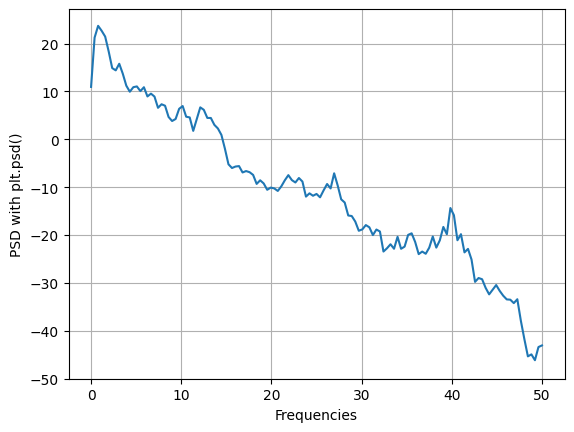

In [5]:
# computing PSD using plt.psd()
# It uses Welch periodogram technique by default

freqs,psd = plt.psd(eeg_data, Fs=100, noverlap=50)

plt.xlabel("Frequencies")
plt.ylabel("PSD with plt.psd()")

plt.show()

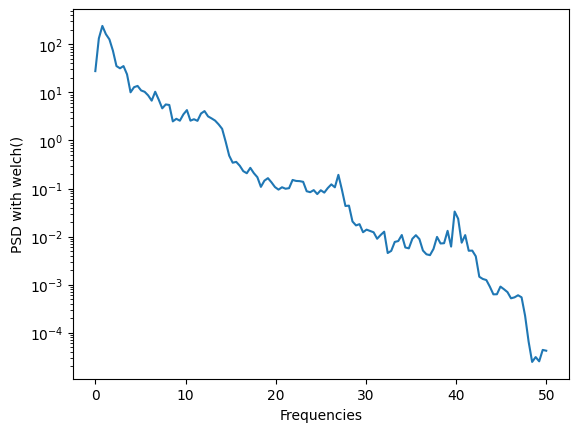

In [6]:
# computing PSD using welch()

frequencies, Psd = welch(eeg_data, fs=100)

plt.semilogy(frequencies,Psd)
#plt.plot(frequencies, Psd)
plt.xlabel("Frequencies")
plt.ylabel("PSD with welch()")

plt.show()

This was my first attempt, hardwiring the whole algorithm. It uses the Fast Fourier transform to compute the psd. But I couldn't segment and overlap them to create periodograms, so meh. Anyways, here it is.

   We clearly notice how the welch periodogram technique is helpful in reducing the variance. The plot with welch's technique used has a much smoother estimate of power spectral density.

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


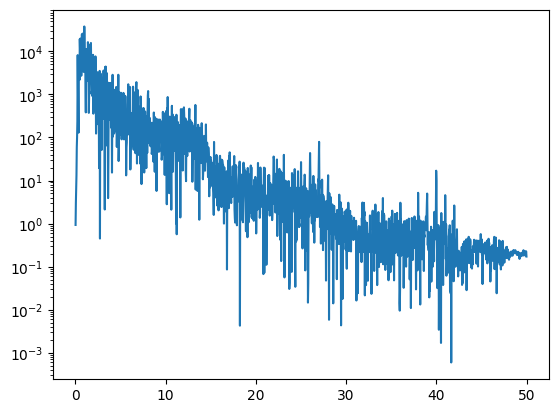

In [7]:
# hardwiring the code for psd (an attempt)

n = len(x)
fhat = np.fft.fft(eeg_data,n)
pSd = fhat * np.conj(fhat) / n
freqy = (1/(dt*n)) * np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int')

plt.semilogy(freqy[L],pSd[L])
#plt.plot(freqy[L],pSd[L])
#plt.xlim(freqy[L[0]],freqy[L[-1]])

plt.show()

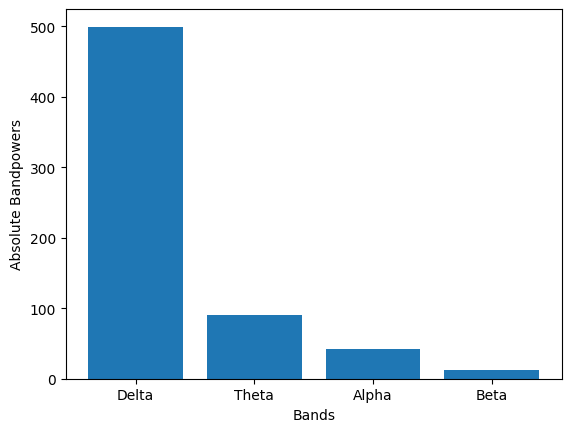

In [8]:
# calculating absolute bandpowers
# absolute bandpower = sum of all psd values in between the frequency values

def abs_bandpower(start_f, end_f):
    band_indices = np.where((frequencies >= start_f) & (frequencies <= end_f))

    absolute_bandpower = np.sum(Psd[band_indices])

    return absolute_bandpower

delta_abs = abs_bandpower(1, 4)
theta_abs = abs_bandpower(4, 8)
alpha_abs = abs_bandpower(8, 13)
beta_abs = abs_bandpower(13, 30)

abs_bandpowers = np.array([delta_abs, theta_abs, alpha_abs, beta_abs])
x_axis = np.array(["Delta", "Theta", "Alpha", "Beta"])

plt.bar(x_axis, abs_bandpowers)
plt.xlabel("Bands")
plt.ylabel("Absolute Bandpowers")

plt.show()

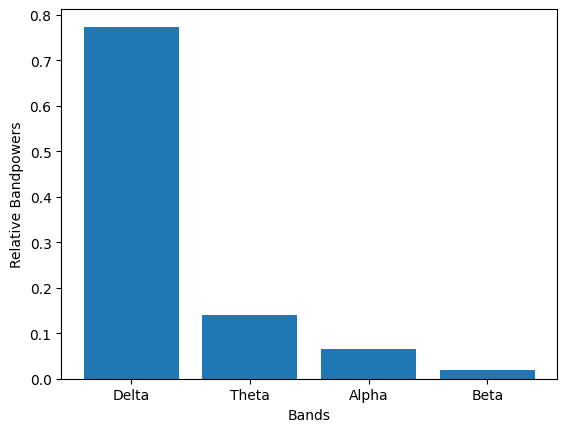

In [9]:
# calculating relative bandpowers

total_bandpower = abs_bandpower(1,30)

rel_delta_abs = delta_abs / total_bandpower
rel_theta_abs = theta_abs / total_bandpower
rel_alpha_abs = alpha_abs / total_bandpower
rel_beta_abs = beta_abs / total_bandpower

rel_bandpowers = np.array([rel_delta_abs, rel_theta_abs, rel_alpha_abs, rel_beta_abs])

plt.bar(x_axis, rel_bandpowers)
plt.xlabel("Bands")
plt.ylabel("Relative Bandpowers")

plt.show()

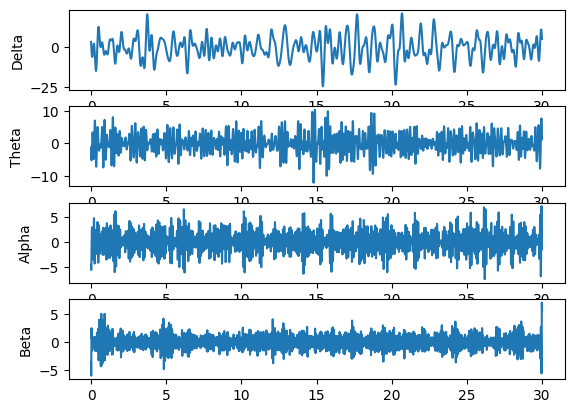

In [10]:
# separating the signal into its components

def signal(start_f, end_f):
  indices = (freqy >= start_f) & (freqy <= end_f)
  fhat_clean = fhat * indices
  ffilt = np.fft.ifft(fhat_clean)

  return ffilt

fig,axs = plt.subplots(4,1)

plt.sca(axs[0])
plt.plot(x, signal(1,4))
plt.ylabel("Delta")

plt.sca(axs[1])
plt.plot(x, signal(4,8))
plt.ylabel("Theta")

plt.sca(axs[2])
plt.plot(x, signal(8,13))
plt.ylabel("Alpha")

plt.sca(axs[3])
plt.plot(x, signal(13,30))
plt.ylabel("Beta")

plt.show()

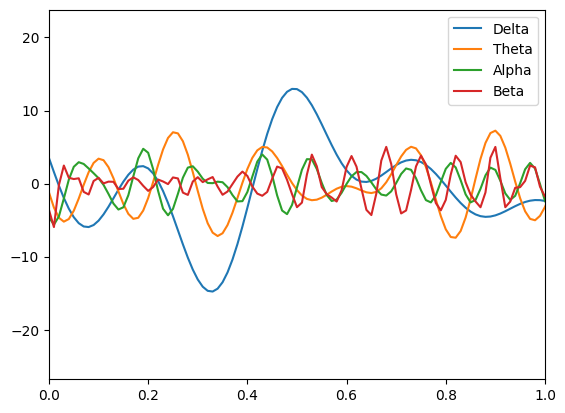

In [11]:
# visualising the brainwaves

plt.plot(x, signal(1,4), label='Delta')
plt.plot(x, signal(4,8), label='Theta')
plt.plot(x, signal(8,13), label='Alpha')
plt.plot(x, signal(13,30), label='Beta')
plt.xlim(0,1)
plt.legend()

plt.show()

### Interpreting the Power Spectral Density

Interpreting the Power Spectral Density (PSD) vs. frequency graph of different brain waves involves understanding the frequency ranges associated with different types of brain activity and how they manifest in the PSD plot. Here's a general guideline for interpreting such graphs:

1. **Frequency Bands**:
   - **Delta Waves (0.5 - 4 Hz)**: Delta waves are associated with deep sleep, unconsciousness, and are often prominent in infants. In the PSD plot, you'd expect to see higher power in the lower frequency range (0.5 - 4 Hz).
   
   - **Theta Waves (4 - 8 Hz)**: Theta waves are associated with relaxation, creativity, and sometimes with deep meditation or light sleep. In the PSD plot, you'd expect to see a peak in power in the theta frequency range (4 - 8 Hz).
   
   - **Alpha Waves (8 - 12 Hz)**: Alpha waves are associated with a relaxed yet alert state, often observed when closing one's eyes or during a state of wakeful relaxation. In the PSD plot, you'd expect to see a peak in power in the alpha frequency range (8 - 12 Hz).
   
   - **Beta Waves (12 - 30 Hz)**: Beta waves are associated with active thinking, concentration, alertness, and focused cognitive tasks. In the PSD plot, you'd expect to see a peak in power in the beta frequency range (12 - 30 Hz).
   
   - **Gamma Waves (30 - 100+ Hz)**: Gamma waves are associated with higher cognitive functions, perception, problem-solving, and consciousness. In the PSD plot, you'd expect to see a peak in power in the gamma frequency range (30 - 100+ Hz).

2. **Power Distribution**:
   - The height or amplitude of the peaks in the PSD plot represents the power or strength of the corresponding brain wave activity.
   
   - Different states of consciousness or mental activity may exhibit characteristic patterns in the PSD plot. For example, during deep sleep, you'd expect higher power in the delta range, while during focused concentration, you'd expect higher power in the beta range.

3. **Relative Power**:
   - In addition to absolute power levels, it's often informative to consider the relative power within different frequency bands. This can provide insights into the balance of brain activity across different states.

4. **Artifact Identification**:
   - Sometimes, artifacts such as muscle activity, eye blinks, or electrical interference can introduce peaks or distortions in the PSD plot. Careful examination and filtering may be necessary to distinguish genuine brain wave activity from artifacts.

In summary, interpreting the PSD vs. frequency graph involves identifying characteristic peaks corresponding to different brain wave frequencies, understanding their associated mental states, and considering the relative power distribution across frequency bands.

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:1870: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


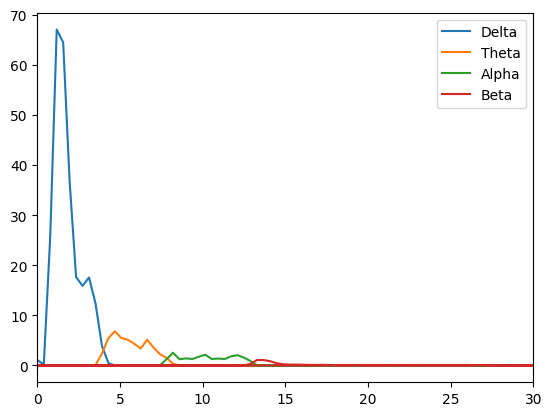

In [12]:
# visualising the psd values of these individual brainwaves

freq_delta, psd_delta = welch(signal(1,4), fs=100)
freq_theta, psd_theta = welch(signal(4,8), fs=100)
freq_alpha, psd_alpha = welch(signal(8,13), fs=100)
freq_beta, psd_beta = welch(signal(13,30), fs=100)

plt.plot(freq_delta, psd_delta, label="Delta")
plt.plot(freq_theta, psd_theta, label="Theta")
plt.plot(freq_alpha, psd_alpha, label="Alpha")
plt.plot(freq_beta, psd_beta, label="Beta")
plt.xlim(0,30)
plt.legend()

plt.show()